In [59]:
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, SpatialDropout2D, BatchNormalization, Flatten, Activation, Conv2D, MaxPooling2D, Conv1D
from keras.optimizers import RMSprop
import tensorflow as tf
import numpy as np

# Importing CIFAR 10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# train split to validation
x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size=0.2)

train_x = x_train1.astype('float32') / 255 
valid_x = x_valid.astype('float32') / 255
test_x = x_test.astype('float32') / 255

print(y_train1.shape)

N = 10

# One-hot encoding
train_y = to_categorical(y_train1, N).reshape(-1,1,1,10)
valid_y = to_categorical(y_valid, N).reshape(-1,1,1,10)
test_y = to_categorical(y_test, N).reshape(-1,1,1,10)
print(train_y.shape)
print(train_x.shape)
print(valid_x.shape)
print(test_x.shape)

(40000, 1)
(40000, 1, 1, 10)
(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [60]:
def Model():
  
    Alex_model = Sequential()
    
    Alex_model.add(Conv2D(64, kernel_size=(3,3), strides = 2, padding='same', input_shape=(32, 32, 3))) # 1st Layer
    Alex_model.add(BatchNormalization())
    Alex_model.add(SpatialDropout2D(rate=0.5))
    Alex_model.add(Activation('relu'))
    #Alex_model.add(MaxPooling2D(pool_size=(2,2),  strides = 2, padding='same'))
    
    Alex_model.add(Conv2D(192, kernel_size=(3,3), strides = 2, padding='same'))       # 2nd Layer
    Alex_model.add(BatchNormalization())
    Alex_model.add(SpatialDropout2D(rate=0.5))
    Alex_model.add(Activation('relu'))
    #Alex_model.add(MaxPooling2D(pool_size=(2,2),  strides = 2))
    
    Alex_model.add(Conv2D(384, kernel_size=(3,3), strides = 2, padding='same'))       # 3rd Layer
    Alex_model.add(BatchNormalization())
    Alex_model.add(SpatialDropout2D(rate=0.5))
    Alex_model.add(Activation('relu'))
    #Alex_model.add(MaxPooling2D(pool_size=(2,2),  strides = 2))
    
    Alex_model.add(Conv2D(256, kernel_size=(3,3), strides = 2, padding='same'))       # 4th Layer
    Alex_model.add(BatchNormalization())
    Alex_model.add(SpatialDropout2D(rate=0.5))
    Alex_model.add(Activation('relu'))
    #Alex_model.add(MaxPooling2D(pool_size=(2,2),  strides = 2))
    
    Alex_model.add(Conv2D(256, kernel_size=(3,3), strides = 2, padding='same'))       # 5th Layer
    Alex_model.add(BatchNormalization())
    Alex_model.add(SpatialDropout2D(rate=0.5))
    Alex_model.add(Activation('relu'))
    #Alex_model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
    
    #Alex_model.add(Flatten())
    
    Alex_model.add(Conv2D(4096, kernel_size=(1,1), strides = 1, padding='same'))
    #Alex_model.add(Dense(4096))                     # 6th Layer
    Alex_model.add(BatchNormalization())
    Alex_model.add(Activation('relu'))
    Alex_model.add(Dropout(rate=0.5))
    
    Alex_model.add(Conv2D(4096, kernel_size=(1,1), strides = 1, padding='same'))
    #Alex_model.add(Dense(4096))                     # 7th Layer
    Alex_model.add(BatchNormalization())
    Alex_model.add(Activation('relu'))
    Alex_model.add(Dropout(rate=0.5))
    
    Alex_model.add(Conv2D(10, kernel_size=(1,1), strides = 1, padding='same'))
    #Alex_model.add(Dense(10))                       # 8th Layer
    Alex_model.add(Activation('softmax'))
    
    return Alex_model


Alex_model = Model()
Alex_model.compile(loss='categorical_crossentropy',
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['accuracy'])
Alex_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 16, 16, 64)        1792      
_________________________________________________________________
batch_normalization_77 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
spatial_dropout2d_55 (Spatia (None, 16, 16, 64)        0         
_________________________________________________________________
activation_71 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 8, 8, 192)         110784    
_________________________________________________________________
batch_normalization_78 (Batc (None, 8, 8, 192)         768       
_________________________________________________________________
spatial_dropout2d_56 (Spatia (None, 8, 8, 192)       

In [61]:
# verbose = progress bar setting
history = Alex_model.fit(train_x, train_y, batch_size=128, epochs=100, verbose=1, validation_data=(valid_x, valid_y))

Epoch 1/100
313/313 [==============================] - 9s 25ms/step - loss: 2.9354 - accuracy: 0.1711 - val_loss: 2.7865 - val_accuracy: 0.1352
Epoch 2/100
313/313 [==============================] - 7s 23ms/step - loss: 2.0745 - accuracy: 0.2906 - val_loss: 2.1724 - val_accuracy: 0.3523
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 1.9284 - accuracy: 0.3462 - val_loss: 1.7264 - val_accuracy: 0.4197
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 1.8332 - accuracy: 0.3748 - val_loss: 1.5108 - val_accuracy: 0.4551
Epoch 5/100
313/313 [==============================] - 7s 23ms/step - loss: 1.7803 - accuracy: 0.3988 - val_loss: 1.6378 - val_accuracy: 0.4543
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 1.7689 - accuracy: 0.4148 - val_loss: 1.4670 - val_accuracy: 0.4666
Epoch 7/100
313/313 [==============================] - 7s 23ms/step - loss: 1.7311 - accuracy: 0.4251 - val_loss: 1.4816 - val_accuracy:

In [62]:
score = Alex_model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7613845467567444
Test accuracy: 0.7415000200271606


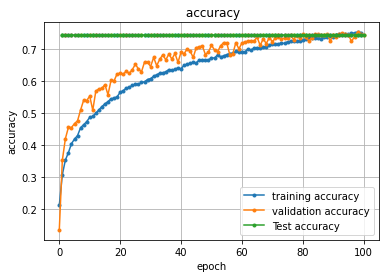

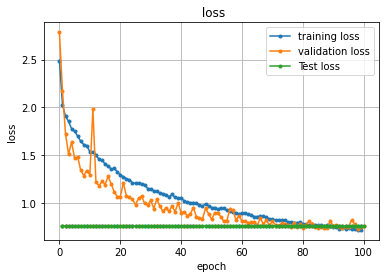

In [63]:
test_accuracy=np.array([np.ones((100))*score[1]])
test_loss=np.array([np.ones((100))*score[0]])
epoch=np.array([np.linspace(1,100,100)])


# Accuracy plots
plt.plot(history.history['accuracy'], marker='.', label='training accuracy')
plt.plot(history.history['val_accuracy'], marker='.', label='validation accuracy')
plt.plot(epoch,test_accuracy, marker='.')
plt.plot(epoch[0],test_accuracy[0], marker='.', label='Test accuracy')
plt.title(' accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.savefig('Task4_accuracyV4.jpeg')
plt.show()

# Loss plots
plt.plot(history.history['loss'], marker='.', label='training loss')
plt.plot(history.history['val_loss'], marker='.', label='validation loss')
plt.plot(epoch,test_loss, marker='.')
plt.plot(epoch[0],test_loss[0], marker='.',label='Test loss')
plt.title(' loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.savefig('Task4_lossV4.jpeg')
plt.show()